## Data Preprocessing

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [ ]:
from keras.utils import get_file
import os

data_url = 'https://storage.googleapis.com/kaggle-competitions-data/kaggle-v2/3364/31151/bundle/archive.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1679405529&Signature=pCsghqiyVWsgPxCCIhkXQxuBAI4QTE5FhwChbSXqTz7rO%2B6Mfm6nD%2FZAVBPc0UE9NzrWgjNjUgmECeAL86yfgO05G%2FDHj1alvP%2F6%2Bgf2pnuqEoGJFRXmbv%2F3Dv0pJQFxmUzxUxBIHe9XTysDIFtYqJpVDgTT%2Bodhths8fO9G69AIOF6bghgCGVnzFRkpXu0sFFpcB%2BS%2BB0evIjcVK9lFJzsNO8PAEjbmezOSJIsksm5mso1FwckMGiXtlhE%2BnNWGH8hrG74%2Fr00iNfQfHN498sU4FgzmRMYXdGlEaG3H%2BMekBKEx9tGLS5EfxAu9lze%2FUn%2Bl9uV4%2B5lZJAZc8nreXg%3D%3D&response-content-disposition=attachment%3B+filename%3Dchallenges-in-representation-learning-facial-expression-recognition-challenge.zip'

zip_file = get_file(fname = 'challenges-in-representation-learning-facial-expression-recognition-challenge.zip', origin = data_url, extract = True)

299063632/299063632 [==============================] - 3s 0us/step


In [ ]:
base_dir, extension = os.path.splitext(zip_file)

print(base_dir + extension)

/root/.keras/datasets/challenges-in-representation-learning-facial-expression-recognition-challenge.zip


In [ ]:
print(os.listdir('/root/.keras/datasets'))

['example_submission.csv', 'icml_face_data.csv', 'fer2013.tar.gz', 'train.csv', 'challenges-in-representation-learning-facial-expression-recognition-challenge.zip', 'test.csv']


In [ ]:
val = pd.read_csv('/root/.keras/datasets/icml_face_data.csv', )

val = val.rename(columns = {' Usage': 'usage', ' pixels': 'pixels'})

In [ ]:
val.head()

val['usage'] = val['usage'] = 'Testing'

val.head()

,emotion,usage,pixels
0,0,Testing,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...
1,0,Testing,151 150 147 155 148 133 111 140 170 174 182 15...
2,2,Testing,231 212 156 164 174 138 161 173 182 200 106 38...
3,4,Testing,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...
4,6,Testing,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...


In [ ]:
train = pd.read_csv('/root/.keras/datasets/train.csv')

In [ ]:
train.head()

,emotion,pixels
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...
1,0,151 150 147 155 148 133 111 140 170 174 182 15...
2,2,231 212 156 164 174 138 161 173 182 200 106 38...
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...


In [ ]:
test = pd.read_csv('/root/.keras/datasets/test.csv')

In [ ]:
test.head()

,pixels
0,254 254 254 254 254 249 255 160 2 58 53 70 77 ...
1,156 184 198 202 204 207 210 212 213 214 215 21...
2,69 118 61 60 96 121 103 87 103 88 70 90 115 12...
3,205 203 236 157 83 158 120 116 94 86 155 180 2...
4,87 79 74 66 74 96 77 80 80 84 83 89 102 91 84 ...


In [ ]:
print(test.shape)
print(train.shape)
print(val.shape)

(7178, 1)
(28709, 2)
(35887, 3)


# EDA

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28709 entries, 0 to 28708
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   emotion  28709 non-null  int64 
 1   pixels   28709 non-null  object
dtypes: int64(1), object(1)
memory usage: 448.7+ KB


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7178 entries, 0 to 7177
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   pixels  7178 non-null   object
dtypes: object(1)
memory usage: 56.2+ KB


In [ ]:
val.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35887 entries, 0 to 35886
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   emotion  35887 non-null  int64 
 1   usage    35887 non-null  object
 2   pixels   35887 non-null  object
dtypes: int64(1), object(2)
memory usage: 841.2+ KB


In [ ]:
emotion = {0:'Angry', 
           1:'Disgust', 
           2:'Fear', 
           3:'Happy', 
           4:'Sad', 
           5:'Surprised', 
           6:'Neutral'}

emotion_graph = ['Angry', 
           'Disgust', 
           'Fear', 
           'Happy', 
           'Sad', 
           'Surprised', 
           'Neutral']

In [ ]:
train['emotion'].value_counts()

3    7215
6    4965
4    4830
2    4097
0    3995
5    3171
1     436
Name: emotion, dtype: int64

In [ ]:
#plot = sns.countplot(train['emotion'])

In [ ]:
train['pixels'] = [np.fromstring(x, dtype = int, sep = ' ').reshape(-1, 48, 48, 1) for x in train['pixels']]

pixels = np.concatenate(train['pixels'])
labels = train.emotion.values

print(pixels.shape, labels.shape)

(28709, 48, 48, 1) (28709,)


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(pixels, labels, test_size=0.2)

In [ ]:
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

y_train.shape, y_test.shape

((22967, 7), (5742, 7))

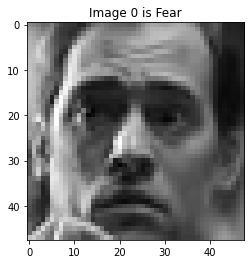

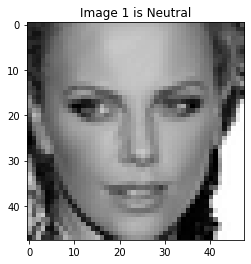

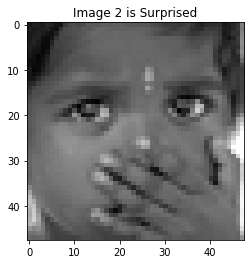

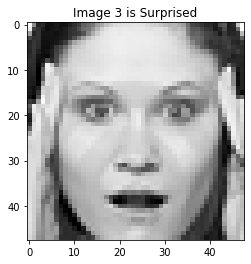

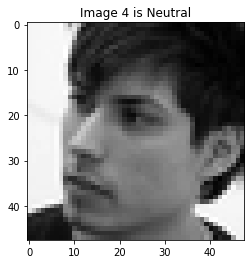

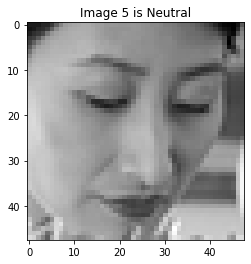

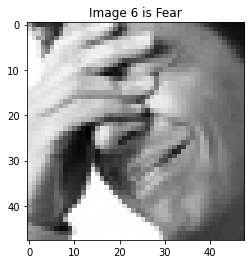

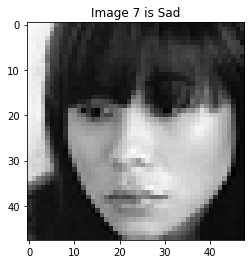

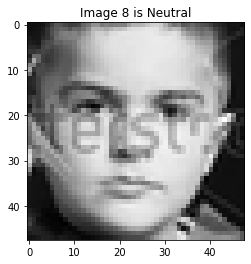

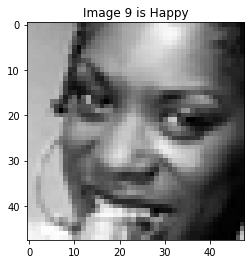

In [ ]:
for i in range(10):
  plt.figure()

  plt.imshow(X_train[i].reshape((48,48)), cmap='gray')
  
  item = y_train[i].argmax(axis = 0)
  image = emotion[item]
  
  plt.title('Image %d is %s' % (i, image))

# Image Augmentation

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(shear_range = 0.2, 
                                   width_shift_range = 0.2,
                                   height_shift_range = 0.2,
                                   zoom_range = 0.2, 
                                   horizontal_flip = True, 
                                   rescale = 1/255)
test_datagen = ImageDataGenerator(rescale = 1/255)

In [ ]:
train_iter = train_datagen.flow(X_train, y_train)

test_iter = test_datagen.flow(X_test, y_test)

In [ ]:
train_iter.reset()

batchX, batchy = train_iter.next()

Xmin = batchX.min()
Xmax = batchX.max()

ymin = batchy.min()
ymax = batchy.max()

print('Batch of shape X =', (batchX.shape), ', X min = %d, X max = %d' % (Xmin, Xmax))
print('Batch of shape y =', (batchy.shape), ', y min = %d, y max = %d' % (ymin, ymax))

Batch of shape X = (32, 48, 48, 1) , X min = 0, X max = 1
Batch of shape y = (32, 7) , y min = 0, y max = 1


<ipython-input-25-49d7c0718fc8>:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


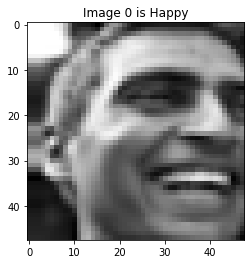

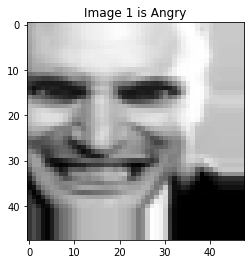

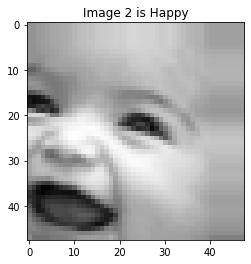

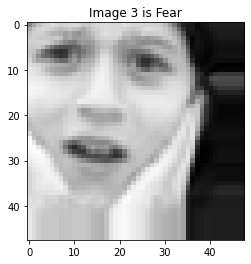

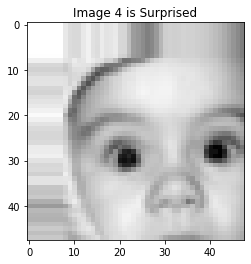

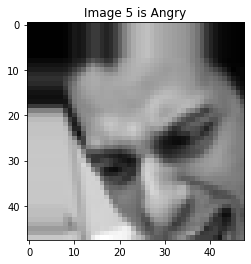

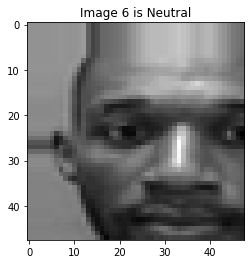

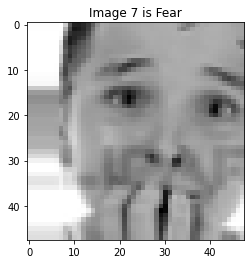

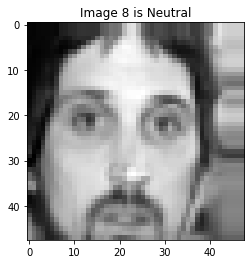

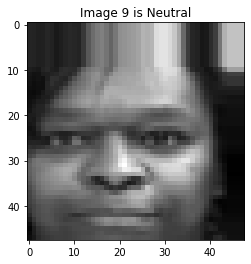

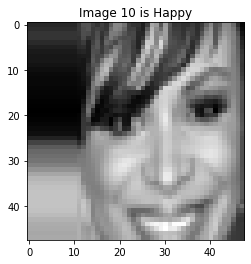

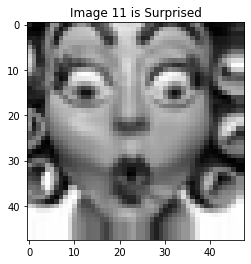

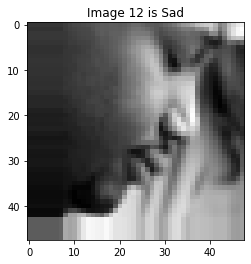

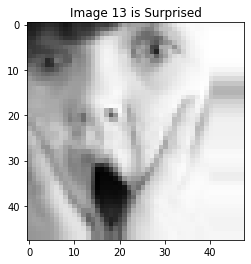

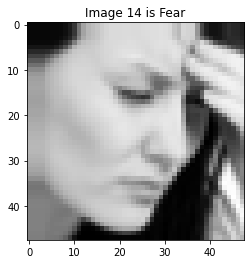

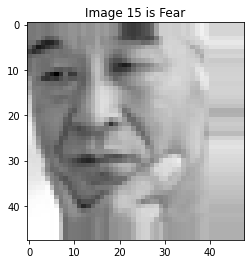

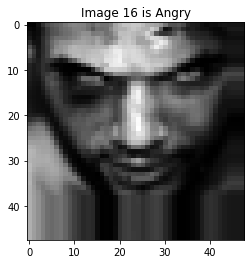

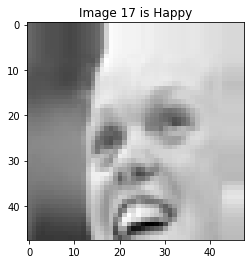

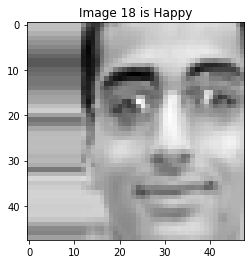

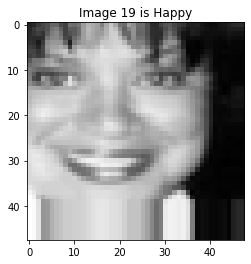

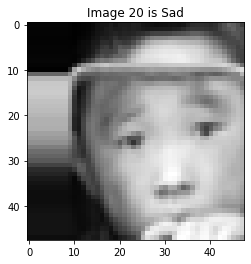

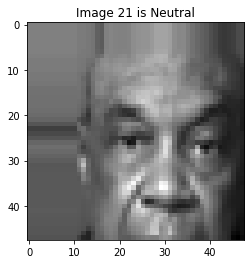

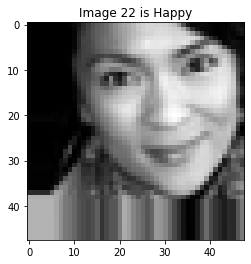

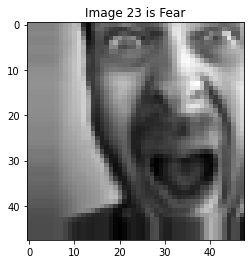

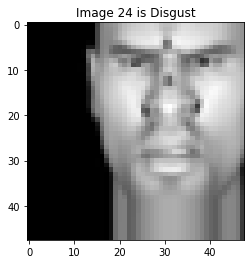

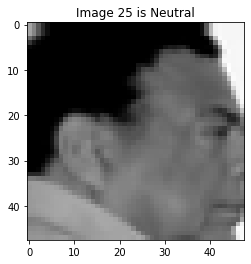

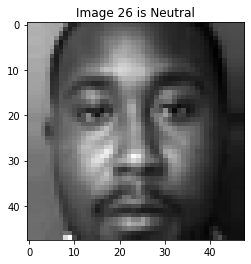

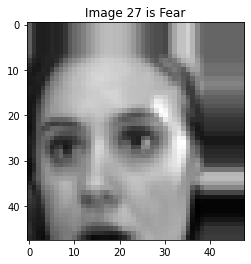

In [ ]:
for idx, img in enumerate(batchX):
  plt.figure()

  plt.imshow(batchX[idx].reshape((48, 48)), cmap = 'gray')
  item = batchy[idx].argmax(axis = 0)
  image = emotion[item]
  plt.title('Image %d is %s' % (idx, image))

# Building the CNN

In [ ]:
img_width, img_height = 48, 48
input_shape = (img_width, img_height, 1)

num_class = 7
batch_size = 32
epochs = 100

train_num = 28709
test_num = 7178

train_steps = train_num // batch_size
test_steps = test_num // batch_size

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
model = keras.Sequential(name = 'Final_Project')

model.add(layers.Conv2D(32, kernel_size = (3, 3), activation = 'relu', input_shape = input_shape))
model.add(layers.MaxPooling2D(pool_size = (2, 2)))
model.add(layers.Conv2D(64, kernel_size = (3, 3), activation = 'relu'))
model.add(layers.MaxPooling2D(pool_size = (2, 2)))
model.add(layers.Conv2D(64, kernel_size = (3, 3), activation = 'relu'))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation = 'relu'))
model.add(layers.Dense(7, activation='softmax'))

model.summary()

In [ ]:
from keras.optimizers import Adam
opt = tf.keras.optimizers.Adam()

model.compile(optimizer = opt, loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
history = model.fit(train_iter,
                    batch_size = batch_size,
                    epochs = epochs,
                    steps_per_epoch=len(X_train) / 64,
                    validation_steps=len(X_test) / 64,
                    validation_data = test_iter)

Epoch 1/100
358/358 [==============================] - 18s 20ms/step - loss: 1.8139 - accuracy: 0.2522 - val_loss: 1.7816 - val_accuracy: 0.2476
Epoch 2/100
358/358 [==============================] - 7s 20ms/step - loss: 1.7833 - accuracy: 0.2540 - val_loss: 1.7445 - val_accuracy: 0.3010
Epoch 3/100
333/358 [==========================>...] - ETA: 0s - loss: 1.7613 - accuracy: 0.2659

In [ ]:
score = model.evaluate(test_iter)

print('Test loss:', score[0])
print('Test accuracy:', score[1])

In [ ]:
from sklearn.metrics import confusion_matrix

y_pred = model.predict(X_train).argmax(axis = 1)
y_train = np.argmax(y_train, axis = 1)

confusion_matrix(y_train, y_pred)

In [ ]:
plt.figure(figsize=(6, 6))
plt.title('Model accuracy')

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
model.save('modeling')

# VGG16 Model

In [ ]:
X_train_new = np.repeat(X_train, repeats = 3, axis = 3)
X_test_new = np.repeat(X_test, repeats = 3, axis = 3)

X_train_new.shape, X_test_new.shape

In [ ]:
base_model = tf.keras.applications.VGG16(
    input_shape = (48, 48, 3), 
    include_top = False, 
    weights = 'imagenet'
)

base_model.trainable = False

In [ ]:
base_model.summary()

In [ ]:
model2 = keras.Sequential(name = 'Final_Project_2')
model2.add(base_model)
model2.add(layers.Flatten())
model2.add(layers.Dense(64, activation='relu'))
model2.add(layers.Dropout(0.5))
model2.add(layers.Dense(32, activation='relu'))
model2.add(layers.Dropout(0.25))
model2.add(layers.Dense(32, activation='relu'))
model2.add(layers.Dropout(0.15))
model2.add(layers.Dense(7, activation='softmax'))

model2.summary()

In [ ]:
opt = tf.keras.optimizers.Adam()

model2.compile(optimizer = opt, loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
y_train

In [ ]:
history2 = model2.fit(X_train_new, y_train,
           epochs = epochs,
           verbose=1,
           validation_data = (X_test_new, y_test))

In [ ]:
## My Google Colab stopped running properly and I'm trying to fix it